# import libraries and Dataset

In [129]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV


warnings.filterwarnings("ignore")

In [130]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score


In [131]:
generation_data1= pd.read_csv('Plant_1_Generation_Data.csv')

In [132]:
generation_data2= pd.read_csv('Plant_2_Generation_Data.csv')

In [133]:
weather_data1= pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [134]:
weather_data2= pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

# Merging generation data2 and weather sensor data2

In [135]:
solar = pd.merge(generation_data2.drop(columns = ['PLANT_ID']), weather_data2.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
solar


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


# Split The data

In [136]:
df = solar.copy()

In [137]:
df

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


In [138]:
df=df.set_index("DATE_TIME")

In [139]:
df.reset_index()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


In [140]:
df = df.reset_index()

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            67698 non-null  object 
 1   SOURCE_KEY           67698 non-null  object 
 2   DC_POWER             67698 non-null  float64
 3   AC_POWER             67698 non-null  float64
 4   DAILY_YIELD          67698 non-null  float64
 5   TOTAL_YIELD          67698 non-null  float64
 6   AMBIENT_TEMPERATURE  67698 non-null  float64
 7   MODULE_TEMPERATURE   67698 non-null  float64
 8   IRRADIATION          67698 non-null  float64
dtypes: float64(7), object(2)
memory usage: 4.6+ MB


In [142]:
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"])

In [143]:
df = df.set_index("DATE_TIME")

In [144]:
df=df.resample("H")["AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION","DC_POWER"].mean()
df.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
DATE_TIME,,,,
2020-05-15 00:00:00,26.767055,24.582656,0.0,0.0
2020-05-15 01:00:00,26.505909,25.172109,0.0,0.0
2020-05-15 02:00:00,26.296562,24.555514,0.0,0.0
2020-05-15 03:00:00,26.141691,24.627655,0.0,0.0
2020-05-15 04:00:00,25.509473,24.658230,0.0,0.0


In [145]:
X = df[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
y = df['DC_POWER']

In [146]:
y.mean()

248.87088119552809

In [147]:
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.8,random_state=2529)

# XGBoost

In [148]:
# Replace 0 values with a small positive value
y = y.replace(0, 1e-6)

# Apply log1p transformation to y
y_log = np.log1p(y)


Text(0.5, 0, 'log(PerCapitaConsumption)')

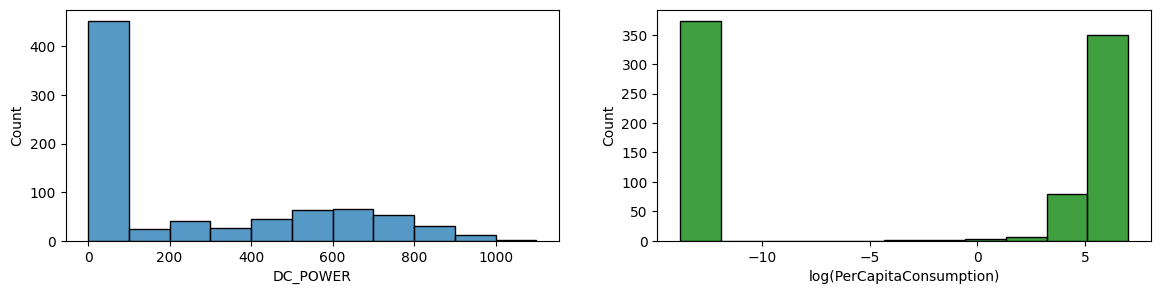

In [149]:
y_log = np.log(y)

plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
sns.histplot(y)

plt.subplot(1, 2, 2)
sns.histplot(y_log, color='green')

plt.xlabel("log(PerCapitaConsumption)")

In [150]:
X_train, X_eval, y_train_log, y_eval_log = train_test_split(X, y_log, random_state=42)

In [151]:
# X_train, X_eval, y_train_log, y_eval_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

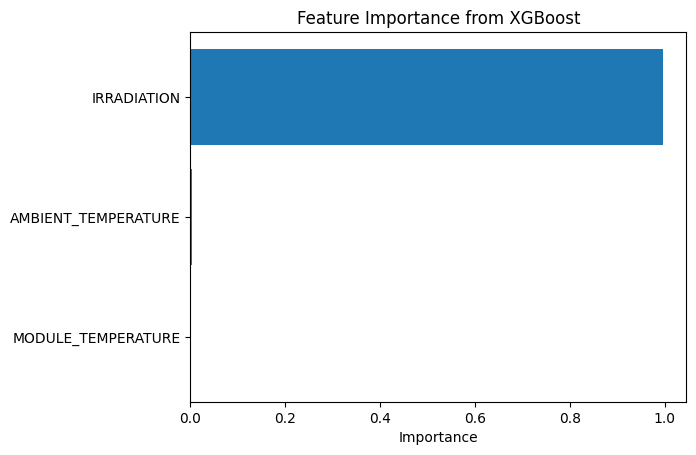

In [152]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is already preprocessed and split into X_train and y_train
# Instantiate the XGBoost model
model_xgb = XGBRegressor(max_depth=6, n_estimators=300, learning_rate=0.1)

# Fit the model to get feature importance
model_xgb.fit(X_train, y_train_log)

# Get feature importances
feature_importance = model_xgb.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance from XGBoost')
plt.show()

In [153]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV


model_xgb = XGBRegressor(max_depth=10,
                         n_estimators=300,
                         eval_metric=["rmse"],
                         learning_rate=0.1)

In [154]:
model_xgb_early_stopping = XGBRegressor(
    max_depth=4,
    n_estimators=300,
    eval_metric=["rmse"],
    learning_rate=0.1,
    early_stopping_rounds=10
)

Best Validation Score 0.4708527471735071


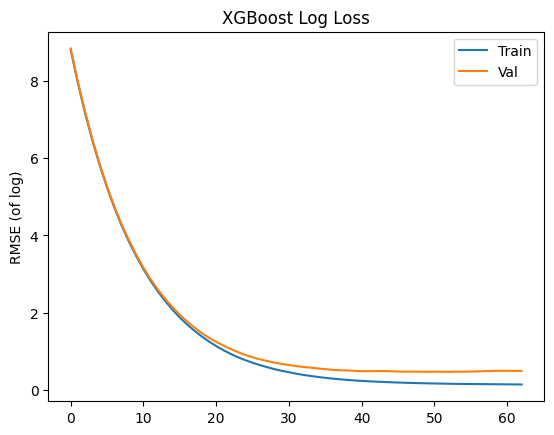

In [155]:
preproc = StandardScaler()


X_train_preproc = preproc.fit_transform(X_train, y_train_log)
X_eval_preproc = preproc.transform(X_eval)

model_xgb_early_stopping.fit(
    X_train_preproc,
    y_train_log,
    verbose=False,
    eval_set=[(X_train_preproc, y_train_log), (X_eval_preproc, y_eval_log)],
)

# Retrieve performance metrics
results = model_xgb_early_stopping.evals_result()
epochs = len(results['validation_0']["rmse"])
x_axis = range(0, epochs)

# Plot RMSLE loss
fig, ax = plt.subplots()

ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Val')
ax.legend(); plt.ylabel('RMSE (of log)'); plt.title('XGBoost Log Loss')

print("Best Validation Score", min(results['validation_1']['rmse']))


In [156]:
# Predictions using the model (after log transformation)
y_pred_log = model_xgb_early_stopping.predict(X_eval_preproc)

# Reverse the log1p transformation to get original values
y_pred = np.expm1(y_pred_log)
y_eval = np.expm1(y_eval_log)

# Calculate MAE
mae = mean_absolute_error(y_eval, y_pred)
print(f"MAE: {mae}")

# Calculate R²
r2 = r2_score(y_eval, y_pred)
print(f"R²: {r2}")

MAE: 33.83393663129146
R²: 0.9449257470173147


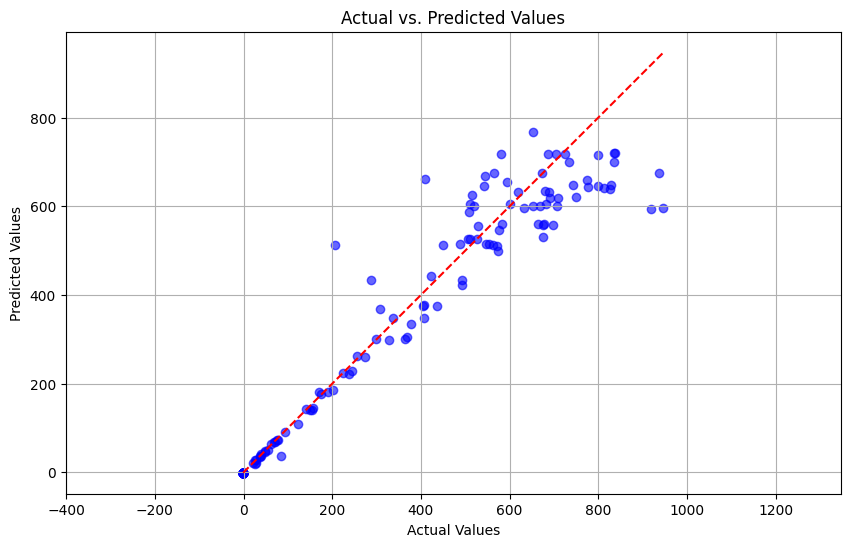

In [157]:
import matplotlib.pyplot as plt

# Reverse the log1p transformation to get original values for both predictions and actual values
y_pred = np.expm1(y_pred_log)
y_eval = np.expm1(y_eval_log)

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_eval, y_pred, alpha=0.6, color='blue')
plt.plot([y_eval.min(), y_eval.max()], [y_eval.min(), y_eval.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.axis('equal')  # To maintain the aspect ratio
plt.show()


# API Weather Month

In [158]:
data= pd.read_csv('open-meteo.csv')

In [159]:
data

,time,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),wind_speed_100m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C)
0,2024-09-01T00:00,30.4,30,30.6,46.8,31.6,37.8,36.2,32.5
1,2024-09-01T01:00,30.8,31,31.7,48.0,32.4,37.8,36.2,32.5
2,2024-09-01T02:00,30.1,34,32.1,49.9,31.6,37.7,36.2,32.5
3,2024-09-01T03:00,29.5,39,31.7,49.4,30.9,37.6,36.2,32.5
4,2024-09-01T04:00,29.5,41,31.8,48.7,30.5,37.4,36.2,32.5
...,...,...,...,...,...,...,...,...,...
715,2024-09-30T19:00,30.1,34,27.2,41.8,32.9,35.3,35.0,33.4
716,2024-09-30T20:00,29.2,38,25.6,41.1,31.5,35.2,35.0,33.4
717,2024-09-30T21:00,28.5,42,28.0,44.3,30.4,35.2,35.0,33.4
718,2024-09-30T22:00,27.8,45,29.9,46.6,29.4,35.1,35.0,33.4


In [160]:
data.isnull().sum()

,0
time,0
temperature_2m (°C),0
relative_humidity_2m (%),0
wind_speed_10m (km/h),0
wind_speed_100m (km/h),0
soil_temperature_0_to_7cm (°C),0
soil_temperature_7_to_28cm (°C),0
soil_temperature_28_to_100cm (°C),0
soil_temperature_100_to_255cm (°C),0


# API Irrdation Month

In [161]:
import requests

In [162]:
API_KEY = "tvATzwa1FudZ9qOK2oWYRDpkNdPsiall"

In [163]:
lat= 28.2344
lon = 34.8444

In [164]:
url =f'https://api.solcast.com.au/data/historic/radiation_and_weather?latitude={lat}&longitude={lon}&azimuth=44&tilt=90&start=2024-09-01T00:00:00.000Z&end=2024-10-01T00:00:00.000Z&format=json&time_zone=utc&period=PT60M'

In [165]:
headers = {"Authorization": f"Bearer {API_KEY}"}

In [166]:
response = requests.get(url,headers=headers)

In [167]:
len(response.json()["estimated_actuals"])

720

In [168]:
response.json()["estimated_actuals"][0]

{'air_temp': 31,
 'dni': 0,
 'ghi': 0,
 'period_end': '2024-09-01T01:00:00+00:00',
 'period': 'PT60M'}

In [169]:
response.json()["estimated_actuals"][-1]

{'air_temp': 29,
 'dni': 0,
 'ghi': 0,
 'period_end': '2024-10-01T00:00:00+00:00',
 'period': 'PT60M'}

In [170]:

def convert_ghi_to_dataframe(api_response):
    # Initialize an empty list to store the extracted data
    ghi_data = []

    # Loop through each entry in 'estimated_actuals'
    for entry in api_response.get('estimated_actuals', []):
        # Extract the 'ghi' and 'period_end' values
        ghi = entry.get('ghi', None)
        period_end = entry.get('period_end', None)

        # Append these values as a tuple to the list
        ghi_data.append({'Period_End': period_end, 'GHI': ghi})

    # Convert the list to a DataFrame
    df = pd.DataFrame(ghi_data)

    return df

In [171]:
ghi_df = convert_ghi_to_dataframe(response.json())
ghi_df

,Period_End,GHI
0,2024-09-01T01:00:00+00:00,0
1,2024-09-01T02:00:00+00:00,0
2,2024-09-01T03:00:00+00:00,0
3,2024-09-01T04:00:00+00:00,23
4,2024-09-01T05:00:00+00:00,192
...,...,...
715,2024-09-30T20:00:00+00:00,0
716,2024-09-30T21:00:00+00:00,0
717,2024-09-30T22:00:00+00:00,0
718,2024-09-30T23:00:00+00:00,0


In [172]:
data[["time","temperature_2m (°C)",	"soil_temperature_0_to_7cm (°C)"]]

,time,temperature_2m (°C),soil_temperature_0_to_7cm (°C)
0,2024-09-01T00:00,30.4,31.6
1,2024-09-01T01:00,30.8,32.4
2,2024-09-01T02:00,30.1,31.6
3,2024-09-01T03:00,29.5,30.9
4,2024-09-01T04:00,29.5,30.5
...,...,...,...
715,2024-09-30T19:00,30.1,32.9
716,2024-09-30T20:00,29.2,31.5
717,2024-09-30T21:00,28.5,30.4
718,2024-09-30T22:00,27.8,29.4


In [173]:
ghi_df

,Period_End,GHI
0,2024-09-01T01:00:00+00:00,0
1,2024-09-01T02:00:00+00:00,0
2,2024-09-01T03:00:00+00:00,0
3,2024-09-01T04:00:00+00:00,23
4,2024-09-01T05:00:00+00:00,192
...,...,...
715,2024-09-30T20:00:00+00:00,0
716,2024-09-30T21:00:00+00:00,0
717,2024-09-30T22:00:00+00:00,0
718,2024-09-30T23:00:00+00:00,0


# prediction by one month

In [174]:
neom_df = pd.concat([ghi_df[["GHI"]],data[["time","temperature_2m (°C)",	"soil_temperature_0_to_7cm (°C)"]]], axis=1)

In [175]:
neom_df.tail(24)

,GHI,time,temperature_2m (°C),soil_temperature_0_to_7cm (°C)
696,0,2024-09-30T00:00,26.5,28.4
697,0,2024-09-30T01:00,26.4,29.4
698,0,2024-09-30T02:00,26.0,28.5
699,9,2024-09-30T03:00,25.6,27.7
700,154,2024-09-30T04:00,25.4,27.1
701,374,2024-09-30T05:00,26.4,27.3
702,579,2024-09-30T06:00,28.1,28.6
703,742,2024-09-30T07:00,30.1,30.8
704,846,2024-09-30T08:00,32.0,33.7
705,883,2024-09-30T09:00,33.6,36.9


In [176]:
# (time , temperature_2m (°C), soil_temperature_0_to_7cm (°C),GHI )

In [177]:
# neom_df = neom_df.drop(columns=['Period_End', 'relative_humidity_2m (%)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)'])

In [178]:
neom_df.head(1)

,GHI,time,temperature_2m (°C),soil_temperature_0_to_7cm (°C)
0,0,2024-09-01T00:00,30.4,31.6


In [179]:
neom_df = neom_df.rename(columns={'temperature_2m (°C)': 'AMBIENT_TEMPERATURE', 'soil_temperature_0_to_7cm (°C)': 'MODULE_TEMPERATURE', 'GHI': 'IRRADIATION'})

In [180]:
neom_df.head(1)

,IRRADIATION,time,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE
0,0,2024-09-01T00:00,30.4,31.6


In [181]:
neom_df

,IRRADIATION,time,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE
0,0,2024-09-01T00:00,30.4,31.6
1,0,2024-09-01T01:00,30.8,32.4
2,0,2024-09-01T02:00,30.1,31.6
3,23,2024-09-01T03:00,29.5,30.9
4,192,2024-09-01T04:00,29.5,30.5
...,...,...,...,...
715,0,2024-09-30T19:00,30.1,32.9
716,0,2024-09-30T20:00,29.2,31.5
717,0,2024-09-30T21:00,28.5,30.4
718,0,2024-09-30T22:00,27.8,29.4


In [182]:
# Rearranging the columns
neom_df = neom_df[['time', 'IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']]

In [183]:
neom_df

,time,IRRADIATION,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE
0,2024-09-01T00:00,0,30.4,31.6
1,2024-09-01T01:00,0,30.8,32.4
2,2024-09-01T02:00,0,30.1,31.6
3,2024-09-01T03:00,23,29.5,30.9
4,2024-09-01T04:00,192,29.5,30.5
...,...,...,...,...
715,2024-09-30T19:00,0,30.1,32.9
716,2024-09-30T20:00,0,29.2,31.5
717,2024-09-30T21:00,0,28.5,30.4
718,2024-09-30T22:00,0,27.8,29.4


In [184]:
X_new = neom_df[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]

In [185]:
X_new_preproc = preproc.transform(X_new)
y_pred_log = model_xgb_early_stopping.predict(X_new_preproc)
y_pred = np.expm1(y_pred_log)


In [186]:
y_pred.sum()

265694.84

In [187]:
pd.Series(y_pred).map(lambda x:x if x>=0 else 0)

,0
0,0.0000
1,0.0000
2,0.0000
3,621.0047
4,621.0047
...,...
715,0.0000
716,0.0000
717,0.0000
718,0.0000


In [218]:
import pickle

# Export Pipeline as pickle file
with open("XGBoost_by_month.pkl", "wb") as file:
    pickle.dump(model_xgb_early_stopping, file)

# Load Pipeline from pickle file
my_pipeline = pickle.load(open("XGBoost_by_month.pkl","rb"))

#API Irrdation Day

In [189]:
url =f'https://api.solcast.com.au/data/historic/radiation_and_weather?latitude={lat}&longitude={lon}&azimuth=44&tilt=90&start=2024-10-01T00:00:00.000Z&end=2024-10-22T00:00:00.000Z&format=json&time_zone=utc&period=PT60M'

In [190]:
headers = {"Authorization": f"Bearer {API_KEY}"}

In [191]:
response2 = requests.get(url,headers=headers)

In [192]:
response2.json()

{'estimated_actuals': [{'air_temp': 28,
   'dni': 0,
   'ghi': 0,
   'period_end': '2024-10-01T01:00:00+00:00',
   'period': 'PT60M'},
  {'air_temp': 28,
   'dni': 0,
   'ghi': 0,
   'period_end': '2024-10-01T02:00:00+00:00',
   'period': 'PT60M'},
  {'air_temp': 28,
   'dni': 0,
   'ghi': 0,
   'period_end': '2024-10-01T03:00:00+00:00',
   'period': 'PT60M'},
  {'air_temp': 28,
   'dni': 29,
   'ghi': 9,
   'period_end': '2024-10-01T04:00:00+00:00',
   'period': 'PT60M'},
  {'air_temp': 29,
   'dni': 520,
   'ghi': 163,
   'period_end': '2024-10-01T05:00:00+00:00',
   'period': 'PT60M'},
  {'air_temp': 31,
   'dni': 746,
   'ghi': 389,
   'period_end': '2024-10-01T06:00:00+00:00',
   'period': 'PT60M'},
  {'air_temp': 32,
   'dni': 843,
   'ghi': 596,
   'period_end': '2024-10-01T07:00:00+00:00',
   'period': 'PT60M'},
  {'air_temp': 33,
   'dni': 893,
   'ghi': 759,
   'period_end': '2024-10-01T08:00:00+00:00',
   'period': 'PT60M'},
  {'air_temp': 34,
   'dni': 917,
   'ghi': 862,
 

In [193]:
ghi_day = convert_ghi_to_dataframe(response2.json())

In [194]:
ghi_day = ghi_day.loc[[470]]

In [195]:
ghi_day

,Period_End,GHI
470,2024-10-20T15:00:00+00:00,83


# API weather Day

In [196]:
w_day= pd.read_csv('open-meteo-Dayyy.csv')

In [212]:
w_day.head(5)

,time,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),wind_speed_100m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),diffuse_radiation (W/m²)
15,2024-10-20T15:00,32.3,19,15.6,22.9,37.1,32.5,33.8,33.6,40.0


In [198]:
w_day = w_day.loc[[15]]

In [199]:
w_day

,time,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),wind_speed_100m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),diffuse_radiation (W/m²)
15,2024-10-20T15:00,32.3,19,15.6,22.9,37.1,32.5,33.8,33.6,40.0


In [200]:
# Resetting the index before concatenation
df1 = w_day.reset_index(drop=True)
df2 = ghi_day.reset_index(drop=True)

# Concatenate columns
neom_df2 = pd.concat([df1, df2], axis=1)

In [201]:
neom_df2

,time,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),wind_speed_100m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),diffuse_radiation (W/m²),Period_End,GHI
0,2024-10-20T15:00,32.3,19,15.6,22.9,37.1,32.5,33.8,33.6,40.0,2024-10-20T15:00:00+00:00,83


In [202]:
neom_df2 = neom_df2.drop(columns=['Period_End', 'relative_humidity_2m (%)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)'])

In [203]:
neom_df2

,time,temperature_2m (°C),soil_temperature_0_to_7cm (°C),diffuse_radiation (W/m²),GHI
0,2024-10-20T15:00,32.3,37.1,40.0,83


In [204]:
neom_df2 = neom_df2.rename(columns={'temperature_2m (°C)': 'AMBIENT_TEMPERATURE', 'soil_temperature_0_to_7cm (°C)': 'MODULE_TEMPERATURE', 'GHI': 'IRRADIATION'})

In [205]:
neom_df2

,time,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,diffuse_radiation (W/m²),IRRADIATION
0,2024-10-20T15:00,32.3,37.1,40.0,83


# predaction in one Day


In [213]:
X_new = neom_df2[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]

In [214]:
X_new_preproc = preproc.transform(X_new)
y_pred_log = model_xgb_early_stopping.predict(X_new_preproc)
y_pred = np.expm1(y_pred_log)

In [215]:
y_pred

array([640.4372], dtype=float32)

In [216]:
pd.Series(y_pred).map(lambda x:x if x>=0 else 0)

,0
0,640.437195


In [217]:
# Export Pipeline as pickle file
with open("XGBoost_by_Day.pkl", "wb") as file:
    pickle.dump(model_xgb_early_stopping, file)

# Load Pipeline from pickle file
my_pipeline = pickle.load(open("XGBoost_by_Day.pkl","rb"))